<a href="https://colab.research.google.com/github/Merina62/AI-and-ML/blob/main/MerinaShrestha_Worksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Merina Shrestha**

**Student no: np03cs4a220406**

# Building a Simple Fully Connected Neural Network in Keras.

1. Load and Preprocess the Data:

Training set: (17040, 28, 28, 1), Labels: (17040, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


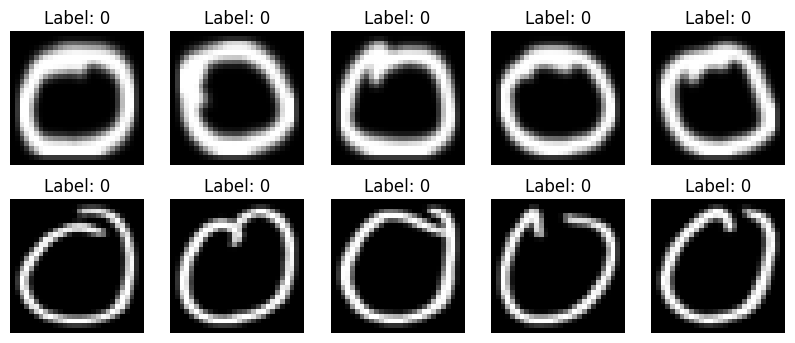

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

# Define dataset paths
train_dir = "/content/drive/MyDrive/AI- 6CS012/Week-4/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/AI- 6CS012/Week-4/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Fixed incorrect quotes
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")

plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
# One-hot encode the labels (0-9) for classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Build the Model:

1. Sequential API:

In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

2. Functional API:

In [ ]:
import tensorflow as tf
from tensorflow import keras

num_classes = 10
input_shape = (28, 28, 1)

def build_functional_model():
    # Input layer
    inputs = keras.Input(shape=input_shape)

    # Flatten layer
    x = keras.layers.Flatten()(inputs)

    # Hidden layers
    x = keras.layers.Dense(64, activation="sigmoid")(x)
    x = keras.layers.Dense(128, activation="sigmoid")(x)
    x = keras.layers.Dense(256, activation="sigmoid")(x)

    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Build the model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

# 3.Compiling and Training the Model:

1. Compilation:

In [ ]:
model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

2. Training of the Model:

In [ ]:
batch_size = 128
epochs = 1000

# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]


# Train the model with callbacks and validation split
history = model.fit(
  x_train,
  y_train,
  batch_size=batch_size,
  epochs=epochs,
  validation_split=0.15,
  callbacks=callbacks,
)

Epoch 1/1000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1082 - loss: 2.3191 - val_accuracy: 0.1063 - val_loss: 2.3013
Epoch 2/1000
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1181 - loss: 2.2998 - val_accuracy: 0.1063 - val_loss: 2.3014
Epoch 3/1000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1218 - loss: 2.2983 - val_accuracy: 0.1063 - val_loss: 2.3001
Epoch 4/1000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1230 - loss: 2.2969 - val_accuracy: 0.1063 - val_loss: 2.2952
Epoch 5/1000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1253 - loss: 2.2943 - val_accuracy: 0.1757 - val_loss: 2.2948
Epoch 6/1000
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1353 - loss: 2.2927 - val_accuracy: 0.1076 - val_loss: 2.2901
Epoch 7/1000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1293 - loss: 2.2900 - val_accuracy: 0.1584 - val_loss: 2.2881
Epoch 8/1000
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1471 - loss: 2.2872 - 

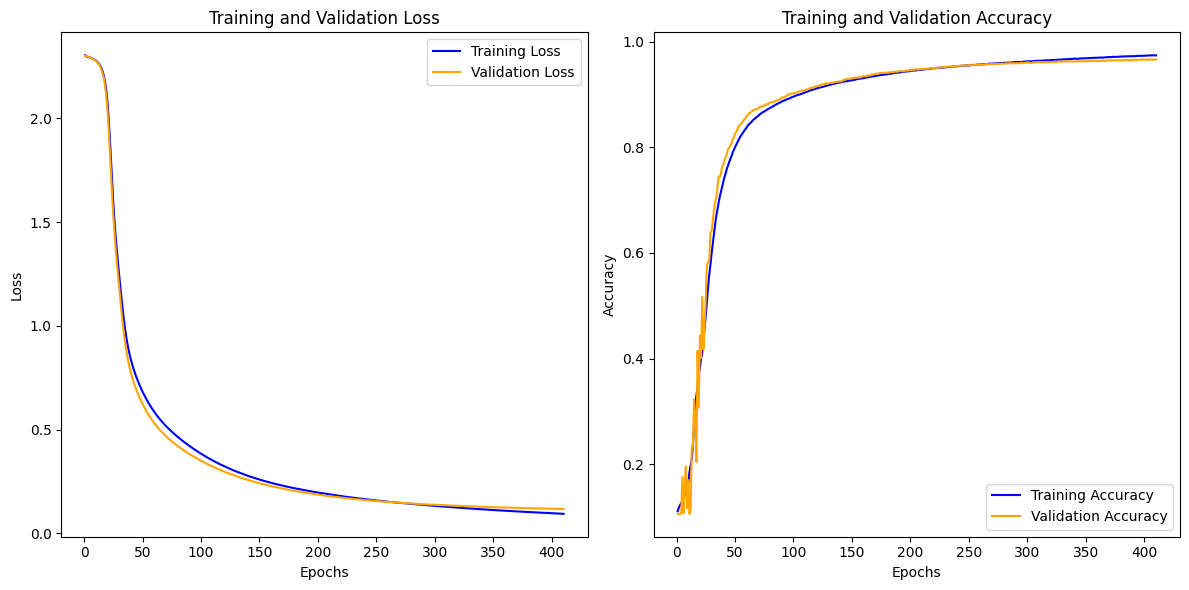

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss", color="blue")
plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label="Training Accuracy", color="blue")
plt.plot(range(1, len(val_acc) + 1), val_acc, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


4. Evaluate the Model:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9624 - loss: 0.1265
Test accuracy: 0.9624


5. Making Predictions with Keras:

In [ ]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 7
True label for first image: 7


6. Saving and Loading the Model:

In [ ]:
model.save('mnist_fully_connected_model.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')

# Exercise: Building a Fully Connected Network (FCN) for Devnagari Digit Classification.

Task 1: Data Preparation

Found classes: ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
Loading class digit_0 (label 0)...
Loading class digit_1 (label 1)...
Loading class digit_2 (label 2)...
Loading class digit_3 (label 3)...
Loading class digit_4 (label 4)...
Loading class digit_5 (label 5)...
Loading class digit_6 (label 6)...
Loading class digit_7 (label 7)...
Loading class digit_8 (label 8)...
Loading class digit_9 (label 9)...
Loaded 17040 images from /content/drive/MyDrive/AI- 6CS012/Week-4/DevanagariHandwrittenDigitDataset/Train
Found classes: ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
Loading class digit_0 (label 0)...
Loading class digit_1 (label 1)...
Loading class digit_2 (label 2)...
Loading class digit_3 (label 3)...
Loading class digit_4 (label 4)...
Loading class digit_5 (label 5)...
Loading class digit_6 (label 6)...
Loading class digit_7 (label 7)...
Loading clas

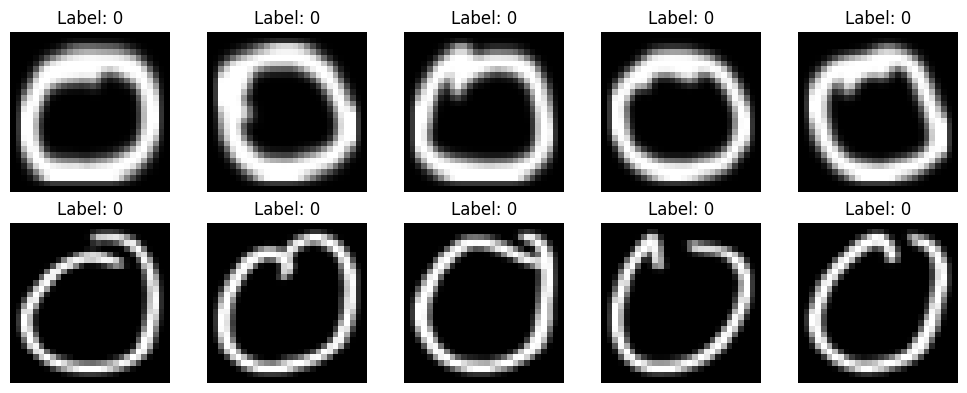

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

train_dir = '/content/drive/MyDrive/AI- 6CS012/Week-4/DevanagariHandwrittenDigitDataset/Train'
test_dir = '/content/drive/MyDrive/AI- 6CS012/Week-4/DevanagariHandwrittenDigitDataset/Test'

if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Train directory not found: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory not found: {test_dir}")

img_height, img_width = 28, 28

def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted([d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))])

    if not class_names:
        raise ValueError(f"No subdirectories found in {folder}")

    print(f"Found classes: {class_names}")
    class_map = {name: i for i, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        print(f"Loading class {class_name} (label {label})...")

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            try:
                img = Image.open(img_path).convert("L")
                img = img.resize((img_width, img_height))
                img_array = np.array(img) / 255.0

                if img_array.shape != (img_height, img_width):
                    print(f"Warning: Image {img_path} has shape {img_array.shape}, expected {(img_height, img_width)}")
                    continue

                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                continue

    print(f"Loaded {len(images)} images from {folder}")
    return np.array(images), np.array(labels)

try:
    x_train, y_train = load_images_from_folder(train_dir)
    x_test, y_test = load_images_from_folder(test_dir)
except Exception as e:
    print(f"Error loading datasets: {e}")
    raise

if len(x_train) == 0 or len(x_test) == 0:
    raise ValueError("No images were loaded. Check your dataset paths and structure.")

x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

num_classes = len(np.unique(np.concatenate([y_train, y_test])))
print(f"Number of classes detected: {num_classes}")

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

plt.figure(figsize=(10, 4))
for i in range(min(10, len(x_train))):  # Ensure we don't exceed available samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Task 2: Build the FCN Model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)


Task 3: Compile the Model

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Task 4: Train the Model

Epoch 1/20
206/213 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7491 - loss: 0.8047

213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7539 - loss: 0.7895 - val_accuracy: 0.0000e+00 - val_loss: 8.9640
Epoch 2/20
209/213 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9676 - loss: 0.1078

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9675 - loss: 0.1080 - val_accuracy: 0.0737 - val_loss: 7.6513
Epoch 3/20
212/213 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9777 - loss: 0.0714

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9777 - loss: 0.0714 - val_accuracy: 0.0874 - val_loss: 8.2068
Epoch 4/20
209/213 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9840 - loss: 0.0509

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9840 - loss: 0.0509 - val_accuracy: 0.2204 - val_loss: 8.5247
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9904 - loss: 0.0298

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9904 - loss: 0.0298 - val_accuracy: 0.2691 - val_loss: 8.3986
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9932 - loss: 0.0250 - val_accuracy: 0.1740 - val_loss: 10.2597
Epoch 7/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9924 - loss: 0.0216 - val_accuracy: 0.1969 - val_loss: 10.5369
Epoch 8/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9955 - loss: 0.0129 - val_accuracy: 0.2518 - val_loss: 10.2015


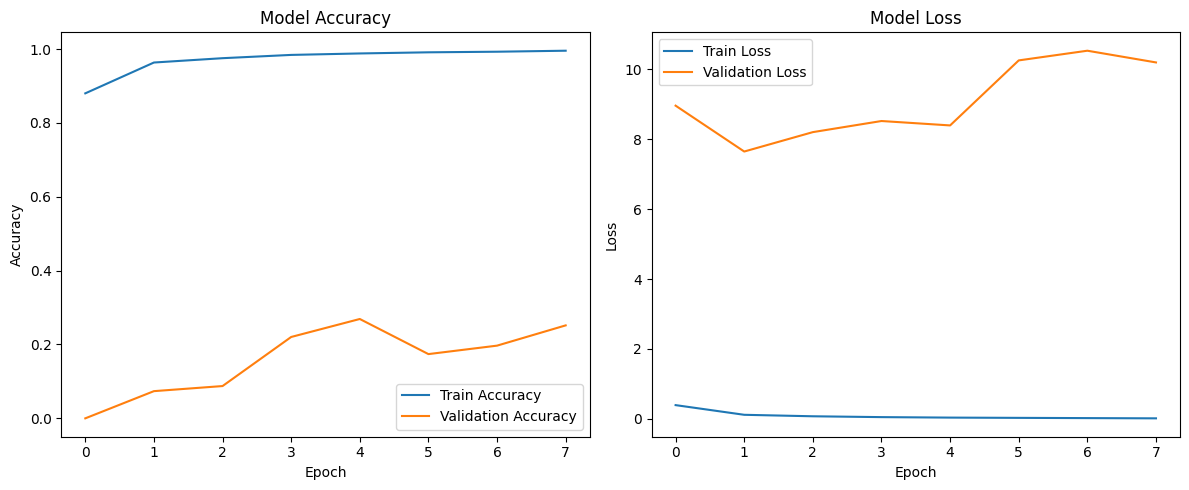

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True),
    EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
]

history = model.fit(
    x_train_flat, y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

Task 5: Evaluate the Model

In [5]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.8383
Test Loss: 1.6864


Task 6: Save and Load the Model

In [6]:
model.save('devanagari_fcn_model.h5')
print("Model saved as 'devanagari_fcn_model.h5'")

from tensorflow.keras.models import load_model
loaded_model = load_model('devanagari_fcn_model.h5')

loaded_test_loss, loaded_test_acc = loaded_model.evaluate(x_test_flat, y_test, verbose=0)
print(f"\nLoaded Model Test Accuracy: {loaded_test_acc:.4f}")
print(f"Loaded Model Test Loss: {loaded_test_loss:.4f}")

Model saved as 'devanagari_fcn_model.h5'

Loaded Model Test Accuracy: 0.8383
Loaded Model Test Loss: 1.6864


Task 7: Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


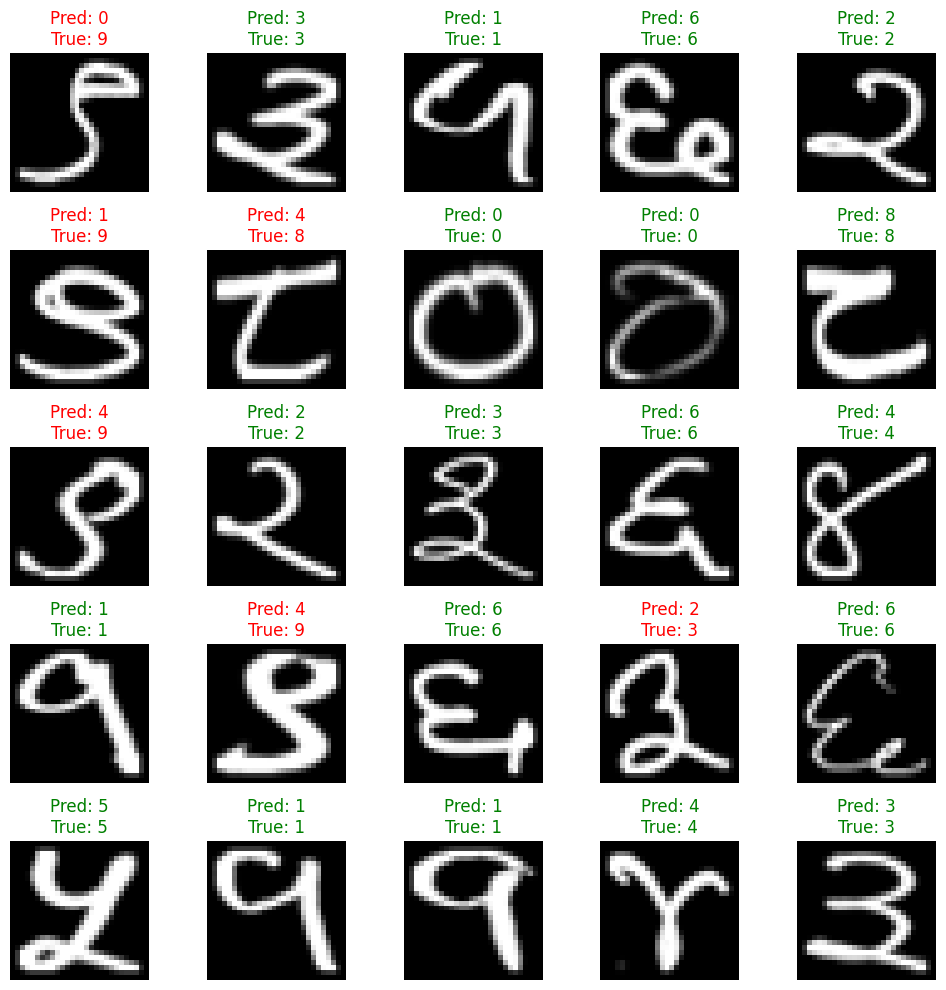


Prediction Accuracy on Samples: 19/25 (76.00%)


In [7]:
sample_indices = np.random.choice(len(x_test_flat), 25, replace=False)
sample_images = x_test_flat[sample_indices]
sample_labels = y_test[sample_indices]

predictions = loaded_model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(sample_labels, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

correct = np.sum(predicted_labels == true_labels)
print(f"\nPrediction Accuracy on Samples: {correct}/25 ({correct/25:.2%})")